In [85]:
from skimage.filters import threshold_otsu as th_otsu
from skimage.filters import try_all_threshold
from skimage.filters import threshold_yen as th_yen
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import os
filename = os.path.join(os.getcwd(), 'brain_tumor.bmp')
gears_path = os.path.join(os.getcwd(), 'gears1.png')
text_path = os.path.join(os.getcwd(), 'printed_text.png')
from skimage import io
img = io.imread(filename)
gears = io.imread(gears_path)
text_img = io.imread(text_path)

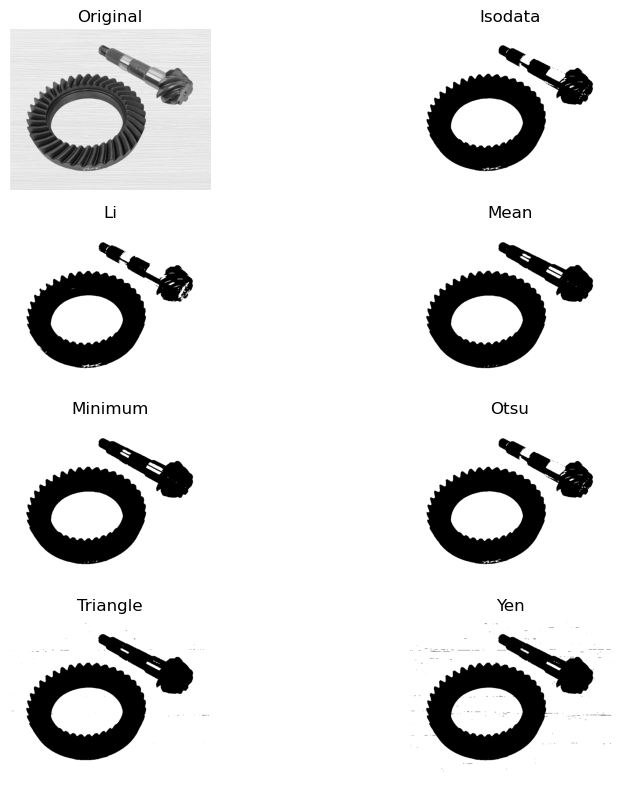

In [86]:
fig, ax = try_all_threshold(gears, figsize=(10, 8), verbose=False)
plt.show()

In [87]:
otsu_gear_th = th_otsu(gears)
yen_gear_th = th_yen(gears)

In [88]:
def my_otsu(image):
    # Flatten the image to 1D array
    pixels = image.flatten()

    # Calculate histogram
    histogram, edges = np.histogram(pixels, bins=256, range=(0, 256))

    # Total number of pixels
    total_pixels = image.size

    # Compute cumulative sums
    cumulative_sum = np.cumsum(histogram)
    cumulative_sum_rev = np.cumsum(histogram[::-1])[::-1]

    # Compute cumulative means
    eps = np.finfo(float).eps  # Add epsilon to avoid division by zero
    cumulative_mean = np.cumsum(np.arange(256) * histogram) / (cumulative_sum + eps)
    cumulative_mean_rev = (np.cumsum((255 - np.arange(256)) * histogram[::-1]) / (cumulative_sum_rev + eps))[::-1]

    # Compute between-class variance
    variance_between = cumulative_sum * cumulative_sum_rev * (cumulative_mean - cumulative_mean_rev) ** 2

    # Find the threshold that maximizes between-class variance
    best_threshold = np.argmax(variance_between)

    return best_threshold

20


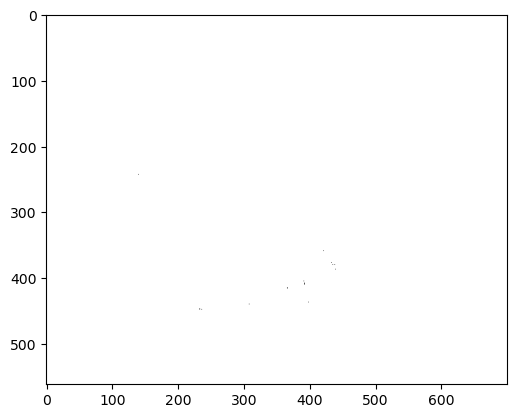

In [89]:
my_otsu_th = my_otsu(gears)
print(my_otsu_th)
bin_gears = gears > my_otsu_th
plt.imshow(bin_gears, cmap=plt.cm.gray)

C:\Users\blasz\AppData\Local\Temp\ipykernel_13512\832641253.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


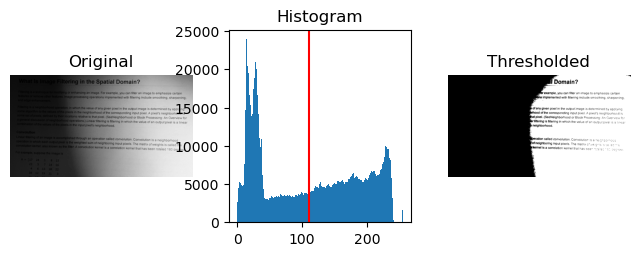

In [90]:
th_img = th_otsu(text_img)
bin_img = text_img > th_img

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(text_img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(text_img.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(th_img, color='r')

ax[2].imshow(bin_img, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

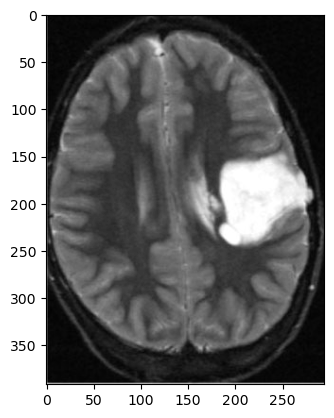

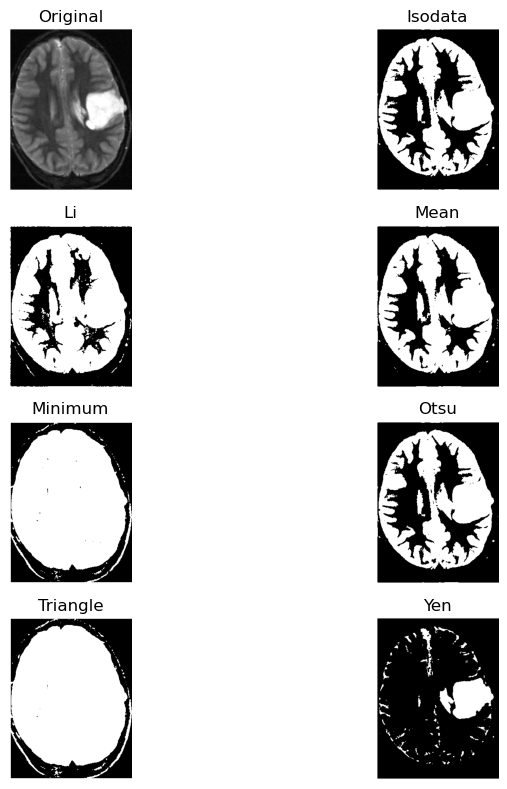

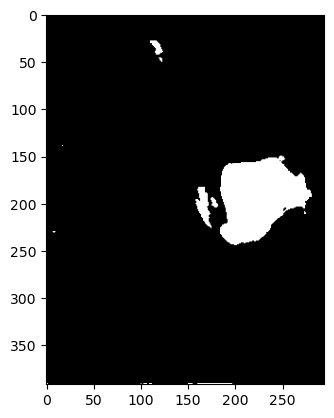

In [91]:
plt.imshow(img, cmap='gray')
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()
yen_th = th_yen(img)
bin_brain = img > 180
plt.imshow(bin_brain, cmap=plt.cm.gray)

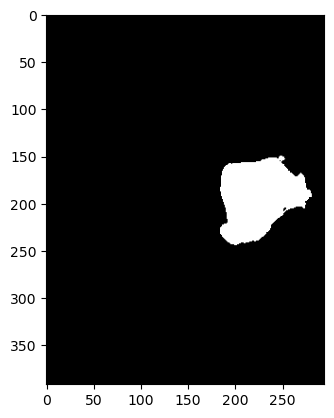

In [92]:
cleared_brain = ski.morphology.remove_small_objects(bin_brain, min_size=600, connectivity=2)#connectivity????
plt.imshow(cleared_brain, cmap='gray')

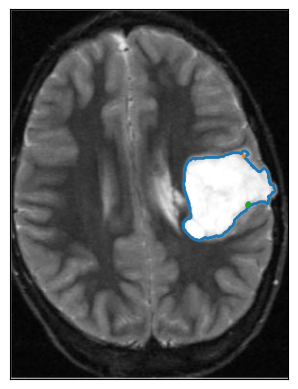

In [93]:
contours = ski.measure.find_contours(cleared_brain)
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [94]:
from skimage.data import chelsea as img1
from skimage import measure
from PIL import Image
##lewa strona obrazu
##ent1 =
##prawa strona entropii
##ent2 =
##greylvl = x
##suma entropii na podstawie histogramu. To x musi być przemnożone przez pi
##-pi*log2(pi)
##-x*log2(x)

r = np.asarray(img1)
print(type(r))
# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

##SUMA od i = 0 do T entp(i)/w1 + sUMA od i = T+1 do 255 entp(pi)/w2. Gdzie entropia ma być maksymalizowana

<class 'numpy.ndarray'>


IndexError: tuple index out of range